# Business Case
## To prepare a complete data analysis report on the given data using a predictive model with implementation of different classifiers on liver patient diseases dataset to predict liver diseases, Also craeate an analysis to show on what basis you have designed your model.  

In [1]:
# Importing all the necessary libraries for data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading data
data=pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')

In [3]:
data

,Age of the patient,Gender of the patients,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [4]:
data.rename(columns={'Age of the patient':'Age','Gender of the patients':'Gender','Total Bilirubin':'Total_bilirubin',
                      'Direct Bilirubin':'Direct_bilirubin','Alkaline Phosphotase':'Alkaline_phosphotase',
                      'Alamine Aminotransferase':'Alamine_aminotransferase',
                      'Aspartate Aminotransferase':'Aspartate_aminotransferase','Total Protiens':'Total_protiens',
                      'Albumin and Globulin Ratio':'Albumin_globulin_ratio'},inplace=True)

In [5]:
data.head(1)

,Age,Gender,Total_bilirubin,Direct_bilirubin,Alkaline_phosphotase,Alamine_aminotransferase,Aspartate_aminotransferase,Total_protiens,Albumin,Albumin_globulin_ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1


# Domain Analysis

# Basic Checks

In [6]:
data.head() # first five rows

,Age,Gender,Total_bilirubin,Direct_bilirubin,Alkaline_phosphotase,Alamine_aminotransferase,Aspartate_aminotransferase,Total_protiens,Albumin,Albumin_globulin_ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [7]:
data.tail() # last five rows

,Age,Gender,Total_bilirubin,Direct_bilirubin,Alkaline_phosphotase,Alamine_aminotransferase,Aspartate_aminotransferase,Total_protiens,Albumin,Albumin_globulin_ratio,Target
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [8]:
data.columns

Index(['Age', 'Gender', 'Total_bilirubin', 'Direct_bilirubin',
       'Alkaline_phosphotase', 'Alamine_aminotransferase',
       'Aspartate_aminotransferase', 'Total_protiens', 'Albumin',
       'Albumin_globulin_ratio', 'Target'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_bilirubin             583 non-null    float64
 3   Direct_bilirubin            583 non-null    float64
 4   Alkaline_phosphotase        583 non-null    int64  
 5   Alamine_aminotransferase    583 non-null    int64  
 6   Aspartate_aminotransferase  583 non-null    int64  
 7   Total_protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_globulin_ratio      579 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine_aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin_globulin_ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Target,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


In [11]:
data.describe(include='O')

,Gender
count,583
unique,2
top,Male
freq,441


Insites
1. Age column shows the minimum age of the patient reported is 4 years and maximum is 90 years which indicates that aging is one of the factore in adults. In children liver disease can be due to genetics or injury.
2. Data indicates no data curruption as all the values lies in the range.
3. There are only about 4 missing values in the whole dataset.

# EDA

Univariate Analysis using sweetviz and histplot,countplot to check the distribution of data and whether the data is balanced.

<Axes: xlabel='Target', ylabel='count'>

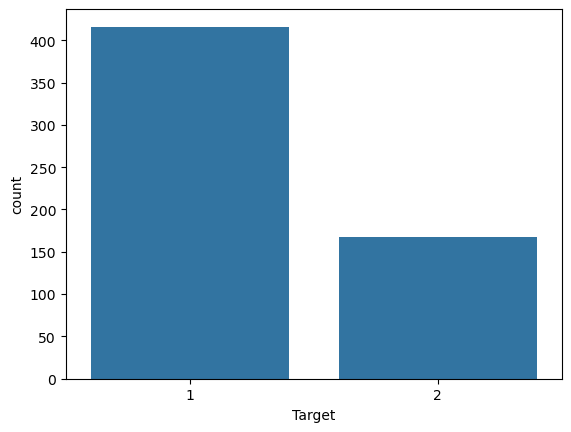

In [12]:
sns.countplot(x='Target',data=data)


Conclusion: The graph indicates that Target veriable is not balanced

In [13]:
numcol=data[['Age', 'Total_bilirubin', 'Direct_bilirubin',
       'Alkaline_phosphotase', 'Alamine_aminotransferase',
       'Aspartate_aminotransferase', 'Total_protiens', 'Albumin',
       'Albumin_globulin_ratio']]

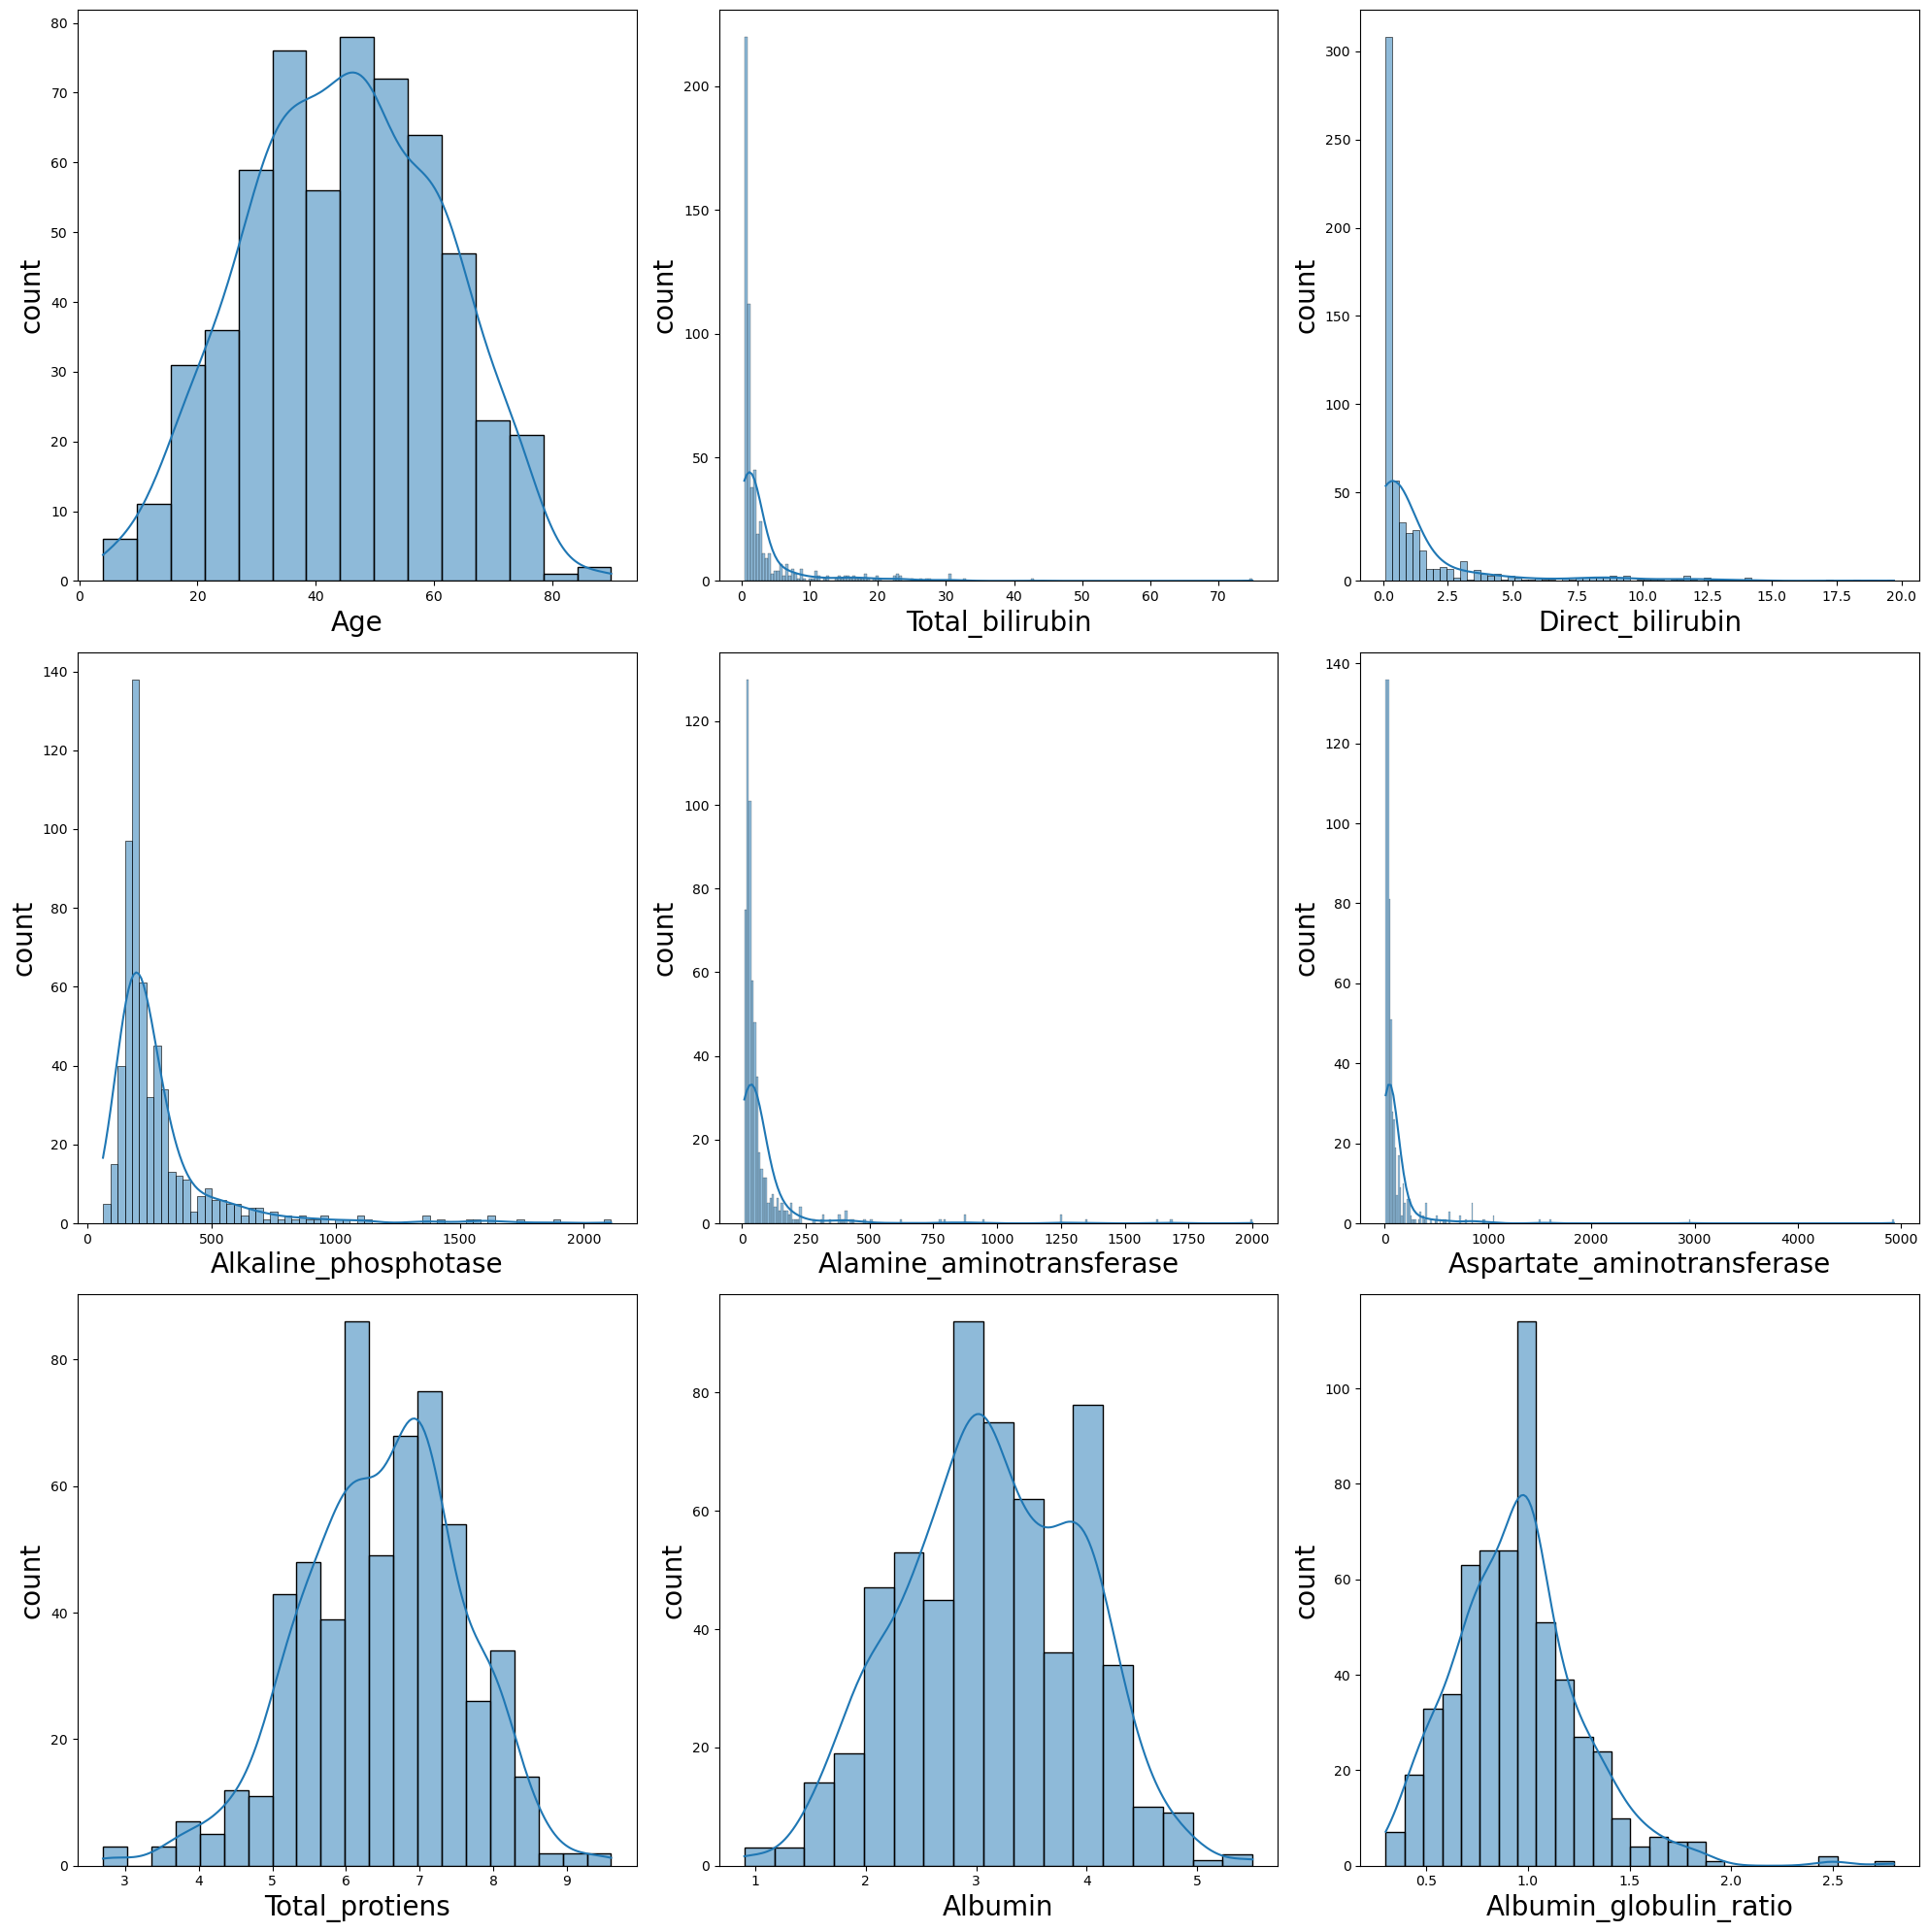

In [14]:
plt.figure(figsize=(20,20),facecolor='White')
plotnum=1

for column in numcol:
    if plotnum<=9:
        ax=plt.subplot(3,3,plotnum)
        sns.histplot(data[column],kde=True)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plotnum+=1
plt.tight_layout()

Insites
1) Age,Total_proteins,Albumin and Albumin-globulin_ratio shows almost normally distributed data.
2) While Total_bilirubin,Direct_bilirubin,Alkaline_phosphotase,Alamine_aminotransferase and Aspartate_aminotransferase shows highly positively skewed data, thus shows presence of outliers.

In [15]:
import sweetviz as sv

In [16]:
report=sv.analyze(data)
report.show_html() #this will generate a report

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Insites

Age
1) Age column shows no missing values.
2) The age of the patiets who took the test for liver disease varies from 10 to 90 years old.
3) Graph indicates that most of the patients or about more than 50% of the patients are from the age group between 25 to 75 years.

Gender
1) From the total entries of 583, there are 441 males and only 142 females.
2) More than 75% of the patients who took the test are Males,while for females it is less than 25%.
Conclusion: People 

Total Bilirubin 
1) This column gives us the information about presence of bilirubin in the blood.
2) Graph indicates that about 90% of the patiesnt's bilirubin level ranges between 0.0 to 10 mg/dL.
3) Less than 5% of the patient's bilirubin level is above 10 mg/dL.
4) Total bilirubin level in blood shows high correlation with the Target column which is nothing but having the liver disease.
Conclusion: High level of bilirubin in blood is one of the major factor for having a liver disease.

Direct Bilirubin
1) More than 80% of the patient have direct bilirubin level between 0.0-2.5 mg/dL.
2) Less than 10% of the patients have direct bilirubin level above 2.5 mg/dL.
3) Direct Bilirubin column shows about (highest)0.25 correlation with the Target column.

Alkaline_phosphotase
1) More than 60% of the total patients who took the test have Alkaline phosphotase level below 250 IU/L.
2) More than 30% of the patients shows Alkaline phosphotaselevel above 250 IU/L.

Alamine_aminotransferase
1) About 65% of the patients shows value of Alamine aminotransferase between the normal range of 7-55 U/L.
2) Less than 5% of the patients have Alamine aminotransferase level above 250 U/L.


Aspartate_aminotransferase
1) Only about 24% of the patients shows higher level of Aspartate aminotransferase,which is above 40 U/L.
2) More than 75% of the patients have normal range of Aspartate aminotransferase.

Total_protiens
1) Graph indicates that about 75% patients show normal range of Total protiens, that is between 6-8 gm/dL.
2) High level of Total protiens only indicates high level of Albumin presence.
3) This column shows only least correlation to the Target column.

Albumin
1) This column shows direct and positiverelation to the Total_protiens as presence of Albumin directly affects the total proteins in the body.
2) More than 55% of the patients have Albumin level in desired range which is 3.4-5.4 g/dL.
3) Most patients show low level of Albumin which is less than 3.4 g/dL.
conclusion: Having low level of Albumin in body indicates malnutrition and it can affect the liver.

Albumin-globulin_ratio
1) Albumin-globulin_ratio shows direct relation to Albumin and Total_protiens.
2) About 25% of the patients shows Albumin-globulin_ratio below 1.0 which indicates low value of Albumin in the body.

## Conclusion

1) Patients with desired level of proteins and enzymes least likely to develop any liver conditions.
2) Normal range of Alkaline phosphotase is from 44-147 IU/L,However this range varies depending on the age and sex. People with much higher levels of Alkaline phosphotase carries risk of liver damage. We can say from the graph, that people who shows more than 250 IU/L of Alkaline phosphotase carries great risk of the disease.
3) People between the age group of 20 to 70 years are more likely to have a liver disease and people between 30 to 50 yaers are highely at risk of the liver disease.
People from age group 30-50 years are considered to be working professinals and are highely at risk due to many factors such as lack of sleep and excersice,unhealthy eating habits.


Bivariate Analysis

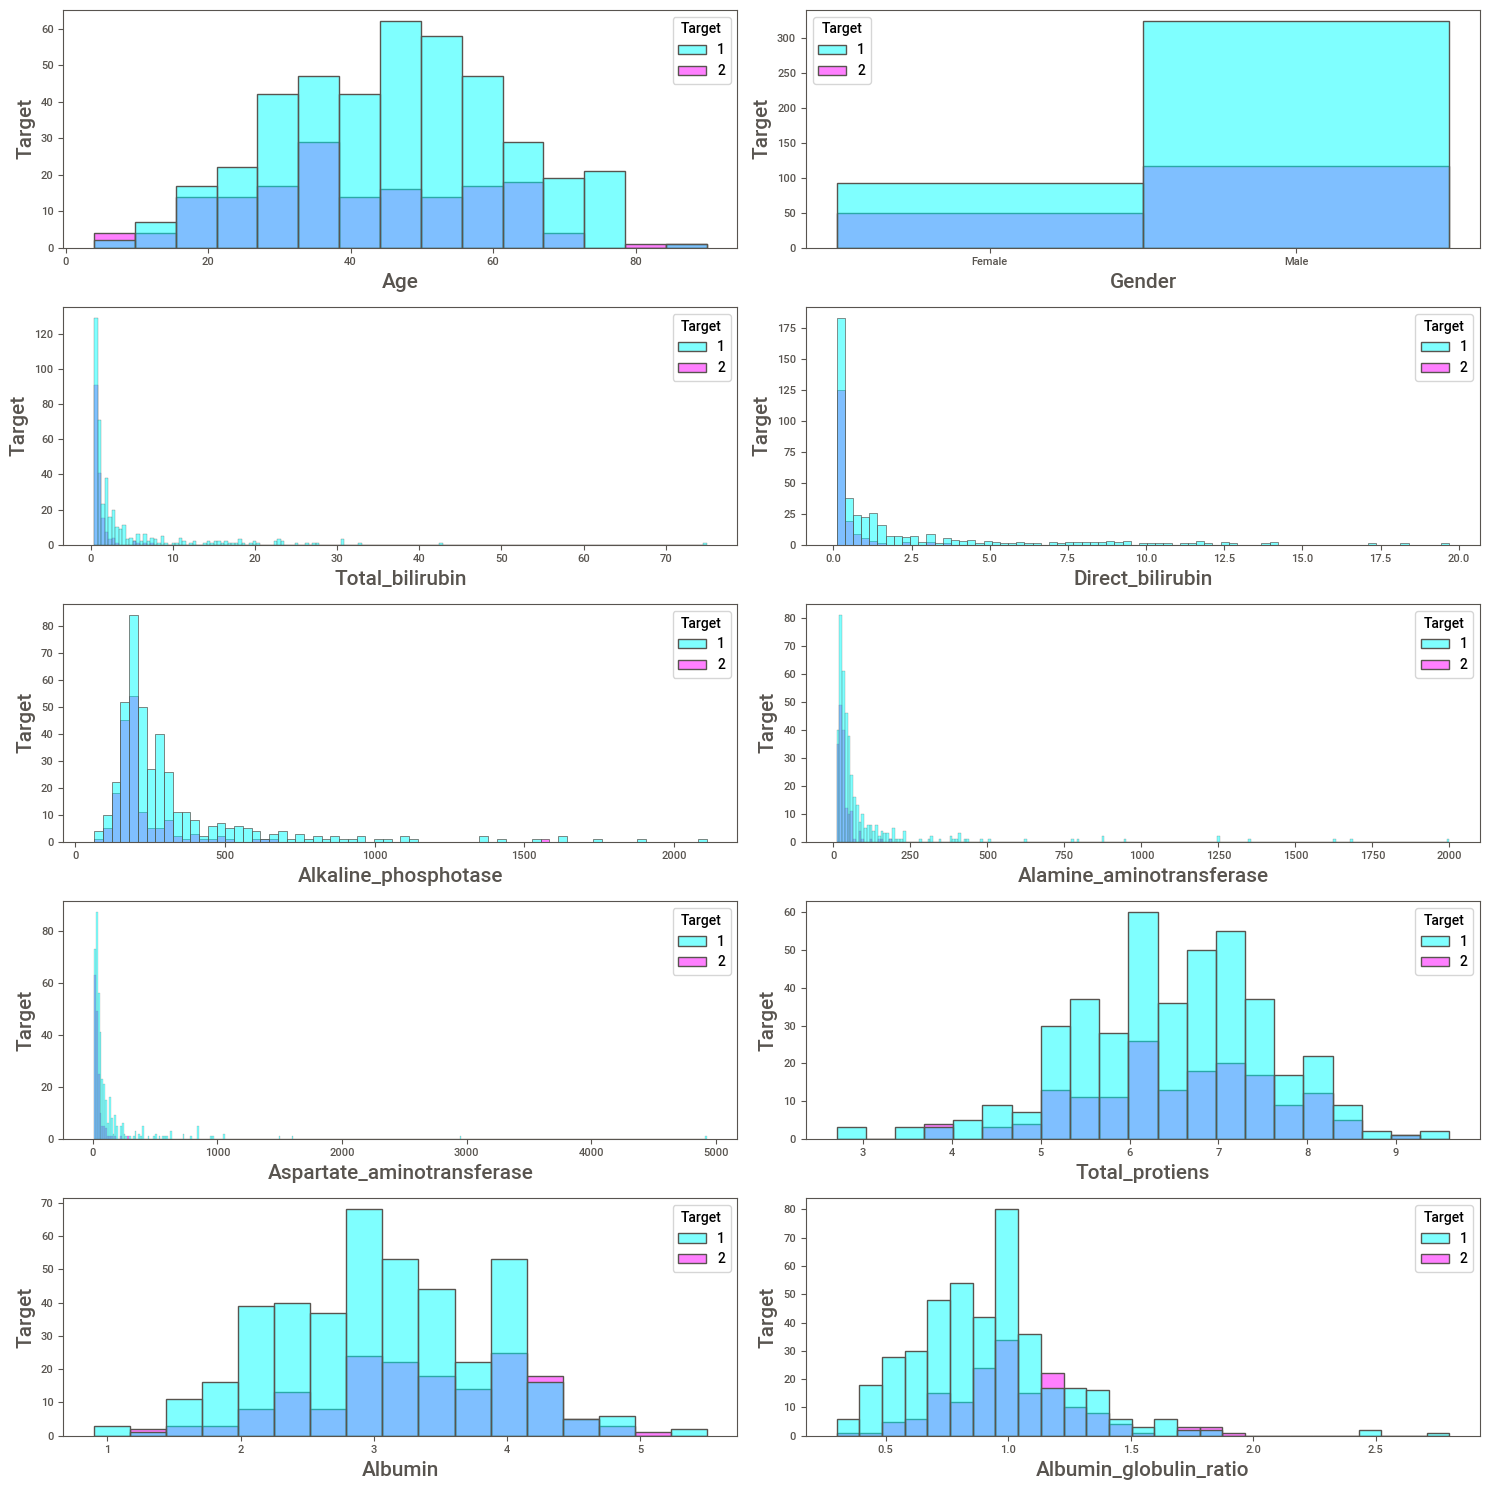

In [17]:
plt.figure(figsize=(15,15))
plotnum=1

for column in data:
    if plotnum<=10:
        ax=plt.subplot(5,2,plotnum)
        sns.histplot(x=data[column],hue=data['Target'],palette='cool')
        plt.xlabel(column,fontsize=15)
        plt.ylabel('Target',fontsize=15)
    plotnum+=1
plt.tight_layout()

Age

1) In the given data, As the age of the person increase the chances of getting liver disease also increases significantly.
2) Data indicates that after the age of 20 years people are highly at risk for the disease.

Gender

1) Females are more likely to get the disease as compared to males.
2) Out of 100 males every 33 males will have the disease.

Total and Direct Bilirubin

1) The chances of getting the disease is less if the bilirubin level is low or normal.
2) Hight or more than normal bilirubin level will increase the chance of getting the disease.

Alkaline_phosphotasease
1) Every person with more than 250 UI/L of Alkaline phosphotase level indicates high chance of liver failure than that of the person having Alkaline phosphotase level below 250 UI/L.
2.A person with Alkaline phosphotasease more than 250 UI/L shows more than 50% chances of developing the disease.

Alamine aminotransferase
1) According to the graph, people with more than 100 UI/L of Alamine aminotransferase shows almost 90% chances of developing the disease.
2) Every person with more than 200 UI/L of Alamine aminotransferase in blood will show the signs of liver malfunction/disease.

Aspartate_aminotransferase
1) Very few people shows Aspartate aminotransferase level more than 200 U/L who are positive for the liver disease.
2) People with less than 40 U/L of Aspartate aminotransferase shows very less chances for developing the liver condition.
3) As the level of Aspartate aminotransferase increases in blood the chances also increases.

Total_protiens, Albumin and Albumin-globulin_ratio
1) Total proteins, albumin and Albumin-globulin ratio are correlated.
2) People with normal range of Albumin-globulin_ratio shows less chances of carrying any liver related issue as compared to the patients with low and above normal level of the same.
3) People with Albulin-globulin ratio of more than 1.2 to 1.5 have least chances of carryin the disease as compared to most patients.

## Conclusion

1) Total and Direct Bilirubin,Alkaline_phosphotasease,Alamine aminotransferase,Aspartate_aminotransferase and Total_protiens, Albumin and Albumin-globulin_ratio these factors directly affect the chances of having liver related disease in the future. 
2) Age and Gender of the people will least likely to contribute to the disease. 
3) High level of bilirubin in females and children can be due to growth hormones or due to pregnancy in females which can lead to temporary increses in bilirubin level.

# Data Processing

In [18]:
# Cheching for null values

data.isnull().sum()

Age                           0
Gender                        0
Total_bilirubin               0
Direct_bilirubin              0
Alkaline_phosphotase          0
Alamine_aminotransferase      0
Aspartate_aminotransferase    0
Total_protiens                0
Albumin                       0
Albumin_globulin_ratio        4
Target                        0
dtype: int64

Insites: Only Albumin-globulin_ratio column has null values and as the column shows almost normally distributed data hence using mean to impute
the null values.

In [19]:
data['Albumin_globulin_ratio'].mean()

0.9470639032815197

In [20]:
# finding the location of missing values in the dataset
data.loc[data['Albumin_globulin_ratio'].isnull()==True]

,Age,Gender,Total_bilirubin,Direct_bilirubin,Alkaline_phosphotase,Alamine_aminotransferase,Aspartate_aminotransferase,Total_protiens,Albumin,Albumin_globulin_ratio,Target
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [21]:
# Imputing the missing values using the mean 
data.loc[data['Albumin_globulin_ratio'].isnull()==True,'Albumin_globulin_ratio']=data['Albumin_globulin_ratio'].mean()

In [22]:
data.isnull().sum()

Age                           0
Gender                        0
Total_bilirubin               0
Direct_bilirubin              0
Alkaline_phosphotase          0
Alamine_aminotransferase      0
Aspartate_aminotransferase    0
Total_protiens                0
Albumin                       0
Albumin_globulin_ratio        0
Target                        0
dtype: int64

In [23]:
# Checking for duplicate values

data.drop_duplicates()


,Age,Gender,Total_bilirubin,Direct_bilirubin,Alkaline_phosphotase,Alamine_aminotransferase,Aspartate_aminotransferase,Total_protiens,Albumin,Albumin_globulin_ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [24]:
# Checking for the location of the duplicated values
data.loc[data.duplicated()==True]

,Age,Gender,Total_bilirubin,Direct_bilirubin,Alkaline_phosphotase,Alamine_aminotransferase,Aspartate_aminotransferase,Total_protiens,Albumin,Albumin_globulin_ratio,Target
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
106,36,Male,5.3,2.3,145,32,92,5.1,2.6,1.00,2
108,36,Male,0.8,0.2,158,29,39,6.0,2.2,0.50,2
138,18,Male,0.8,0.2,282,72,140,5.5,2.5,0.80,1
143,30,Male,1.6,0.4,332,84,139,5.6,2.7,0.90,1
158,72,Male,0.7,0.1,196,20,35,5.8,2.0,0.50,1


## Conclusion
We can say that 2 patients can have same set of values for one or two tests but if we check carefully those two patiests have different values for every other test including their gender and age, which makes them different individuals. As the patients have different set of values for every other test we cannot consider these as duplicate values if we drop or alter the the duplicate values it can impact the prediction of the disease.

# Checking for outliers using boxplot

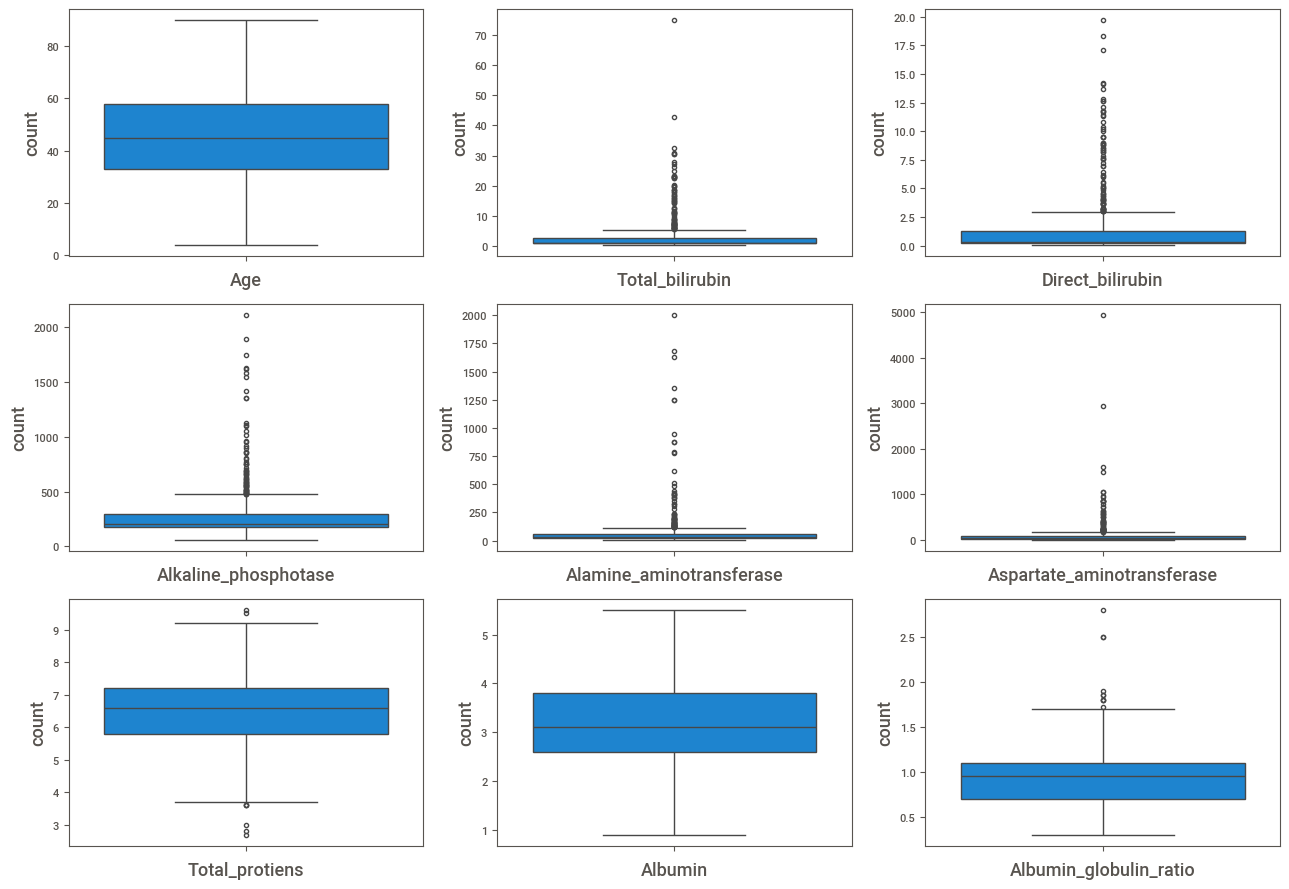

In [25]:
plt.figure(figsize=(13,9),facecolor='white')
columnnum=1

for column in numcol:
    if columnnum<=10:
        ax=plt.subplot(3,3,columnnum)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=13)
        plt.ylabel('count',fontsize=13)
    columnnum+=1
plt.tight_layout()

Insites: All column except Age and Albumin shows presence of outliers.

In [26]:
data.columns

Index(['Age', 'Gender', 'Total_bilirubin', 'Direct_bilirubin',
       'Alkaline_phosphotase', 'Alamine_aminotransferase',
       'Aspartate_aminotransferase', 'Total_protiens', 'Albumin',
       'Albumin_globulin_ratio', 'Target'],
      dtype='object')

### Total_bilirubin

In [27]:

Q1T=data['Total_bilirubin'].quantile(0.25)
Q3T=data['Total_bilirubin'].quantile(0.75)

print('Q1:',Q1T,'Q3:',Q3T)

IQR=Q3T-Q1T

print('IQR',IQR)

Q1: 0.8 Q3: 2.6
IQR 1.8


In [28]:
min_limit=Q1T-1.5*IQR
print('min_limit',min_limit)

max_limit=Q3T+1.5*IQR
print('max_limit',max_limit)

min_limit -1.9000000000000001
max_limit 5.300000000000001


In [29]:
data.loc[data['Total_bilirubin']<min_limit] # no outliers in the -ve direction

,Age,Gender,Total_bilirubin,Direct_bilirubin,Alkaline_phosphotase,Alamine_aminotransferase,Aspartate_aminotransferase,Total_protiens,Albumin,Albumin_globulin_ratio,Target


In [30]:
data.loc[data['Total_bilirubin']>max_limit] #need to check whether the outliers percentage is above 5%

,Age,Gender,Total_bilirubin,Direct_bilirubin,Alkaline_phosphotase,Alamine_aminotransferase,Aspartate_aminotransferase,Total_protiens,Albumin,Albumin_globulin_ratio,Target
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
22,62,Male,6.8,3.0,542,116,66,6.4,3.1,0.90,1
27,34,Male,6.2,3.0,240,1680,850,7.2,4.0,1.20,1
37,46,Female,14.2,7.8,374,38,77,4.3,2.0,0.80,1
...,...,...,...,...,...,...,...,...,...,...,...
572,32,Male,15.6,9.5,134,54,125,5.6,4.0,2.50,1
574,32,Male,12.1,6.0,515,48,92,6.6,2.4,0.50,1
575,32,Male,25.0,13.7,560,41,88,7.9,2.5,2.50,1
576,32,Male,15.0,8.2,289,58,80,5.3,2.2,0.70,1


In [31]:
len(data.loc[data['Total_bilirubin']>max_limit])/len(data)*100 # outliers are more than 5%

14.408233276157805

### Direct_bilirubin

In [32]:
Q1D=data['Direct_bilirubin'].quantile(0.25)
print('Q1',Q1D)

Q3D=data['Direct_bilirubin'].quantile(0.75)
print('Q3',Q3D)


Q1 0.2
Q3 1.3


In [33]:
IQR=Q3D-Q1D
print('IQR',IQR)

IQR 1.1


In [34]:
min_limit=Q1D-1.5*IQR
print('min_limit',min_limit)

max_limit=Q3D+1.5*IQR
print('max_limit',max_limit)


min_limit -1.4500000000000002
max_limit 2.95


In [35]:
data.loc[data['Direct_bilirubin']<min_limit] # no outliers in -ve direction

,Age,Gender,Total_bilirubin,Direct_bilirubin,Alkaline_phosphotase,Alamine_aminotransferase,Aspartate_aminotransferase,Total_protiens,Albumin,Albumin_globulin_ratio,Target


In [36]:
len(data.loc[data['Direct_bilirubin']>max_limit])/len(data)*100 # outliers are more than 5%

13.893653516295027

### Alkaline_phosphotase

In [37]:
Q1A=data['Alkaline_phosphotase'].quantile(0.25)
print('Q1',Q1A)

Q3A=data['Alkaline_phosphotase'].quantile(0.75)
print('Q3',Q3A)


Q1 175.5
Q3 298.0


In [38]:
IQR=Q3A-Q1A
print('IQR',IQR)

IQR 122.5


In [39]:
min_limit=Q1A-1.5*IQR
print('min_limit',min_limit)

max_limit=Q3A+1.5*IQR
print('max_limit',max_limit)


min_limit -8.25
max_limit 481.75


In [40]:
data.loc[data['Alkaline_phosphotase']<min_limit] # no outliers in -ve direction

,Age,Gender,Total_bilirubin,Direct_bilirubin,Alkaline_phosphotase,Alamine_aminotransferase,Aspartate_aminotransferase,Total_protiens,Albumin,Albumin_globulin_ratio,Target


In [41]:
len(data.loc[data['Alkaline_phosphotase']>max_limit])/len(data)*100 # outliers are more than 5%

11.83533447684391

### Alamine_aminotransferase

In [42]:
Q1a=data['Alamine_aminotransferase'].quantile(0.25)
print('Q1',Q1a)

Q3a=data['Alamine_aminotransferase'].quantile(0.75)
print('Q3',Q3a)


Q1 23.0
Q3 60.5


In [43]:
IQR=Q3a-Q1a
print('IQR',IQR)

IQR 37.5


In [44]:
min_limit=Q1a-1.5*IQR
print('min_limit',min_limit)

max_limit=Q3a+1.5*IQR
print('max_limit',max_limit)


min_limit -33.25
max_limit 116.75


In [45]:
len(data.loc[data['Alamine_aminotransferase']<min_limit]) # no outliers in -ve direction

0

In [46]:
len(data.loc[data['Alamine_aminotransferase']>max_limit])/len(data)*100 # outliers are more than 5%

12.521440823327614

### Aspartate_aminotransferase

In [47]:
Q1as=data['Aspartate_aminotransferase'].quantile(0.25)
print('Q1',Q1as)

Q3as=data['Aspartate_aminotransferase'].quantile(0.75)
print('Q3',Q3as)


Q1 25.0
Q3 87.0


In [48]:
IQR=Q3as-Q1as
print('IQR',IQR)

IQR 62.0


In [49]:
min_limit=Q1as-1.5*IQR
print('min_limit',min_limit)

max_limit=Q3as+1.5*IQR
print('max_limit',max_limit)


min_limit -68.0
max_limit 180.0


In [50]:
data.loc[data['Aspartate_aminotransferase']<min_limit] #no outliers in -ve direction

,Age,Gender,Total_bilirubin,Direct_bilirubin,Alkaline_phosphotase,Alamine_aminotransferase,Aspartate_aminotransferase,Total_protiens,Albumin,Albumin_globulin_ratio,Target


In [51]:
len(data.loc[data['Aspartate_aminotransferase']>max_limit])/len(data)*100 # outliers are more than 5%

11.320754716981133

# Conclusion

As there more than 5% outliers in columns (Total_bilirubin', 'Direct_bilirubin','Alkaline_phosphotase','Alamine_aminotransferase',
'Aspartate_aminotransferase') we will not impute it. Theses datapoints indicates the actual values of the tests If we impute this much outliers we might end up loosing useful information which will impact the prediction of the model.

### Total_protiens

In [52]:
# using 3 sigma rule to handle outliers as data is almost normal ditributed

lower_limit=data['Total_protiens'].mean()-3*data['Total_protiens'].std()
print('lower_limit',lower_limit)

upper_limit=data['Total_protiens'].mean()+3*data['Total_protiens'].std()
print('upper_limit',upper_limit)


lower_limit 3.22683594244075
upper_limit 9.739544846581548


In [53]:
len(data.loc[data['Total_protiens']<lower_limit])/len(data)*100 # outliers are less than 5% so we can impute it.

0.5145797598627788

In [54]:
data.loc[data['Total_protiens']<lower_limit]

,Age,Gender,Total_bilirubin,Direct_bilirubin,Alkaline_phosphotase,Alamine_aminotransferase,Aspartate_aminotransferase,Total_protiens,Albumin,Albumin_globulin_ratio,Target
180,75,Male,2.8,1.3,250,23,29,2.7,0.9,0.5,1
181,75,Male,2.9,1.3,218,33,37,3.0,1.5,1.0,1
269,26,Male,0.6,0.1,110,15,20,2.8,1.6,1.3,1


In [55]:
data.loc[data['Total_protiens']<lower_limit,'Total_protiens']=data['Total_protiens'].mean()

In [56]:
data.loc[data['Total_protiens']>upper_limit] # no outliers in +ve direction

,Age,Gender,Total_bilirubin,Direct_bilirubin,Alkaline_phosphotase,Alamine_aminotransferase,Aspartate_aminotransferase,Total_protiens,Albumin,Albumin_globulin_ratio,Target


### Albumin-globulin_ratio

In [57]:
lower_lmt=data['Albumin_globulin_ratio'].mean()-3*data['Albumin_globulin_ratio'].std()
print('lower_limit',lower_lmt)

upper_lmt=data['Albumin_globulin_ratio'].mean()+3*data['Albumin_globulin_ratio'].std()
print('upper_limit',upper_lmt)


lower_limit -0.008411975094503643
upper_limit 1.9025397816575431


In [58]:
data.loc[data['Albumin_globulin_ratio']<lower_lmt] # no outliers in -ve direction

,Age,Gender,Total_bilirubin,Direct_bilirubin,Alkaline_phosphotase,Alamine_aminotransferase,Aspartate_aminotransferase,Total_protiens,Albumin,Albumin_globulin_ratio,Target


In [59]:
len(data.loc[data['Albumin_globulin_ratio']>upper_lmt])/len(data)*100

0.5145797598627788

In [60]:
data.loc[data['Albumin_globulin_ratio']>upper_lmt]

,Age,Gender,Total_bilirubin,Direct_bilirubin,Alkaline_phosphotase,Alamine_aminotransferase,Aspartate_aminotransferase,Total_protiens,Albumin,Albumin_globulin_ratio,Target
548,42,Male,11.1,6.1,214,60,186,6.9,2.8,2.8,1
572,32,Male,15.6,9.5,134,54,125,5.6,4.0,2.5,1
575,32,Male,25.0,13.7,560,41,88,7.9,2.5,2.5,1


In [61]:
data.loc[data['Albumin_globulin_ratio']>upper_lmt,'Albumin_globulin_ratio']=np.mean(data['Albumin_globulin_ratio'])

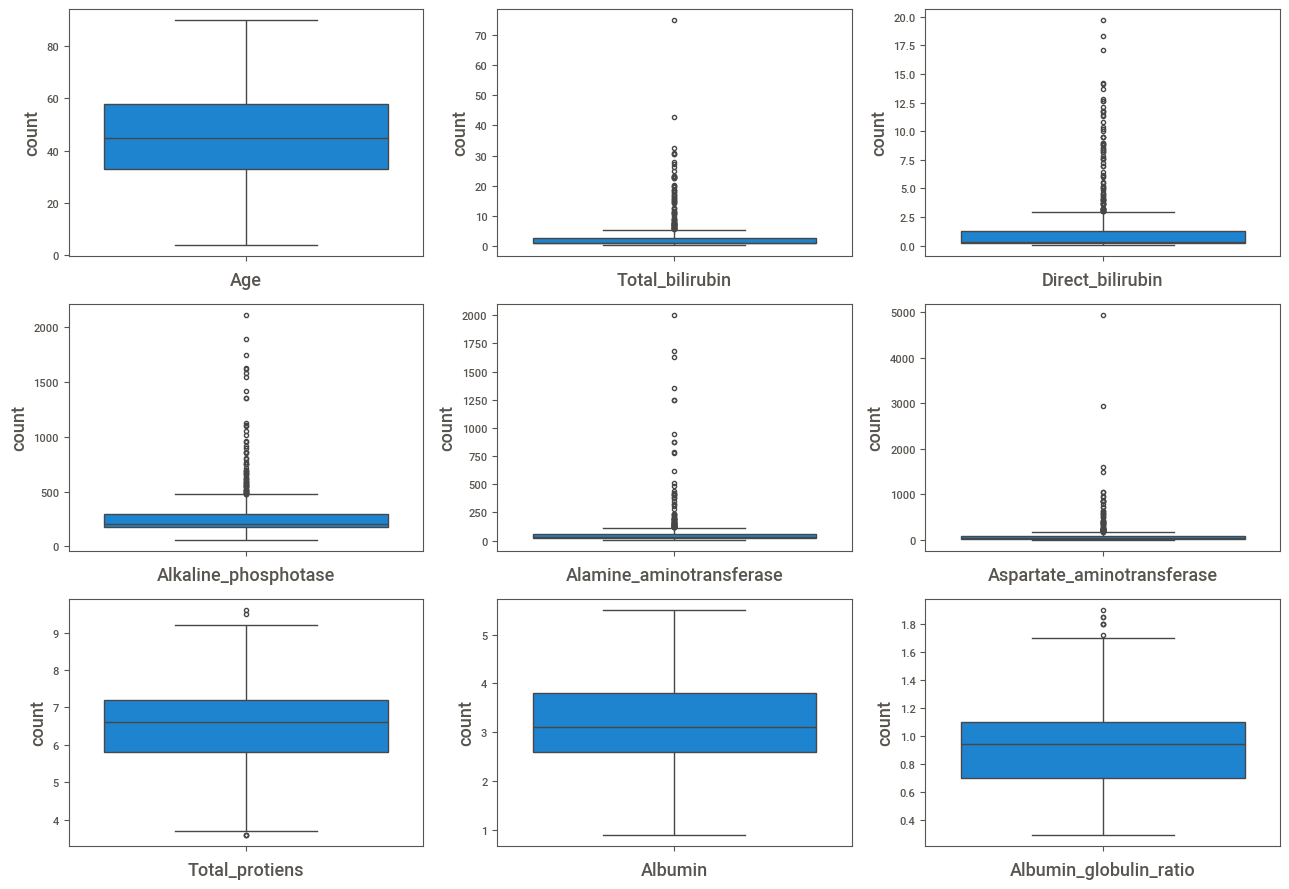

In [62]:
plt.figure(figsize=(13,9),facecolor='white')
columnnum=1

for column in numcol:
    if columnnum<=10:
        ax=plt.subplot(3,3,columnnum)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=13)
        plt.ylabel('count',fontsize=13)
    columnnum+=1
plt.tight_layout()

All the outliers that are below 5% are imputed.

# Conversion of categorical veriable

In [63]:
data.Gender.value_counts()

Gender
Male      441
Female    142
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

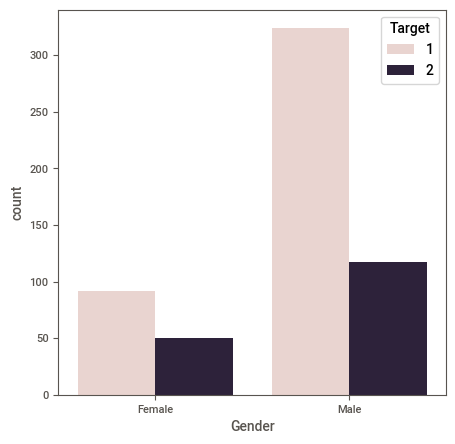

In [64]:
plt.figure(figsize=(5,5))
sns.countplot(data=data,x='Gender',hue='Target')

In [65]:
# Importing the library for encoding technique

from sklearn.preprocessing import LabelEncoder

In [66]:
# Creating a veriable

label=LabelEncoder()
data.Gender=label.fit_transform(data.Gender) # applying label encoder on gender 

In [67]:
data.Gender.value_counts() # data transformed

Gender
1    441
0    142
Name: count, dtype: int64

In [68]:
#changing the Target values in the dataset from 2 to 0 for patients with no liver disease and 1 to 1 for patients with liver disease

data.Target=data.Target.map({2:0,1:1})

In [69]:
data.Target.value_counts()

Target
1    416
0    167
Name: count, dtype: int64

# Scaling

In [70]:
# using MinMaxScaler for scaling as the data we want, the range of the values between 0-1.

from sklearn.preprocessing import MinMaxScaler

In [71]:
# Creating a veriable 

scaler=MinMaxScaler()
d1=['Target'] # creating a seperate veriable for outcome column
data1=scaler.fit_transform(data.drop(d1,axis=1)) # fitting and transforming the data 

In [72]:
data1

array([[0.70930233, 0.        , 0.00402145, ..., 0.53333333, 0.52173913,
        0.375     ],
       [0.6744186 , 1.        , 0.14075067, ..., 0.65      , 0.5       ,
        0.275     ],
       [0.6744186 , 1.        , 0.0924933 , ..., 0.56666667, 0.52173913,
        0.36875   ],
       ...,
       [0.55813953, 1.        , 0.00536193, ..., 0.46666667, 0.5       ,
        0.4375    ],
       [0.31395349, 1.        , 0.01206434, ..., 0.53333333, 0.54347826,
        0.4375    ],
       [0.39534884, 1.        , 0.0080429 , ..., 0.61666667, 0.76086957,
        0.75      ]])

In [73]:
data.head(1) # minmaxscaler gives result in array in order to get the converted values in dataset we need to convert array into dataset

,Age,Gender,Total_bilirubin,Direct_bilirubin,Alkaline_phosphotase,Alamine_aminotransferase,Aspartate_aminotransferase,Total_protiens,Albumin,Albumin_globulin_ratio,Target
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.9,1


In [74]:
data2=pd.DataFrame(data1,columns=['Age', 'Gender', 'Total_bilirubin', 'Direct_bilirubin',
       'Alkaline_phosphotase', 'Alamine_aminotransferase',
       'Aspartate_aminotransferase', 'Total_protiens', 'Albumin',
       'Albumin_globulin_ratio'])

In [75]:
data2 # scaled data

,Age,Gender,Total_bilirubin,Direct_bilirubin,Alkaline_phosphotase,Alamine_aminotransferase,Aspartate_aminotransferase,Total_protiens,Albumin,Albumin_globulin_ratio
0,0.709302,0.0,0.004021,0.000000,0.060576,0.003015,0.001626,0.533333,0.521739,0.37500
1,0.674419,1.0,0.140751,0.275510,0.310699,0.027136,0.018296,0.650000,0.500000,0.27500
2,0.674419,1.0,0.092493,0.204082,0.208598,0.025126,0.011791,0.566667,0.521739,0.36875
3,0.627907,1.0,0.008043,0.015306,0.058134,0.002010,0.002033,0.533333,0.543478,0.43750
4,0.790698,1.0,0.046917,0.096939,0.064485,0.008543,0.009961,0.616667,0.326087,0.06250
...,...,...,...,...,...,...,...,...,...,...
578,0.651163,1.0,0.001340,0.000000,0.213483,0.005025,0.004879,0.383333,0.152174,0.04375
579,0.418605,1.0,0.002681,0.000000,0.017098,0.012563,0.004269,0.400000,0.500000,0.50000
580,0.558140,1.0,0.005362,0.005102,0.088911,0.019095,0.007928,0.466667,0.500000,0.43750
581,0.313953,1.0,0.012064,0.020408,0.059111,0.009548,0.004472,0.533333,0.543478,0.43750


In [76]:
data.columns

Index(['Age', 'Gender', 'Total_bilirubin', 'Direct_bilirubin',
       'Alkaline_phosphotase', 'Alamine_aminotransferase',
       'Aspartate_aminotransferase', 'Total_protiens', 'Albumin',
       'Albumin_globulin_ratio', 'Target'],
      dtype='object')

In [77]:
targetdata=data['Target'] #creating diffrent dataframe for target veriable

In [78]:
finaldata=pd.concat([data2,targetdata],axis=1) #combining all the dataframes into one findal dataframe

In [79]:
finaldata

,Age,Gender,Total_bilirubin,Direct_bilirubin,Alkaline_phosphotase,Alamine_aminotransferase,Aspartate_aminotransferase,Total_protiens,Albumin,Albumin_globulin_ratio,Target
0,0.709302,0.0,0.004021,0.000000,0.060576,0.003015,0.001626,0.533333,0.521739,0.37500,1
1,0.674419,1.0,0.140751,0.275510,0.310699,0.027136,0.018296,0.650000,0.500000,0.27500,1
2,0.674419,1.0,0.092493,0.204082,0.208598,0.025126,0.011791,0.566667,0.521739,0.36875,1
3,0.627907,1.0,0.008043,0.015306,0.058134,0.002010,0.002033,0.533333,0.543478,0.43750,1
4,0.790698,1.0,0.046917,0.096939,0.064485,0.008543,0.009961,0.616667,0.326087,0.06250,1
...,...,...,...,...,...,...,...,...,...,...,...
578,0.651163,1.0,0.001340,0.000000,0.213483,0.005025,0.004879,0.383333,0.152174,0.04375,0
579,0.418605,1.0,0.002681,0.000000,0.017098,0.012563,0.004269,0.400000,0.500000,0.50000,1
580,0.558140,1.0,0.005362,0.005102,0.088911,0.019095,0.007928,0.466667,0.500000,0.43750,1
581,0.313953,1.0,0.012064,0.020408,0.059111,0.009548,0.004472,0.533333,0.543478,0.43750,1


Leving out the "Blancing the Target veriable" step for now, in order to balance the target veriable we first need to split the data into training and testing.

# Feature selection

Doing feature using heatmap as there are less features in the dataset hence we need not apply PCA.

<Axes: >

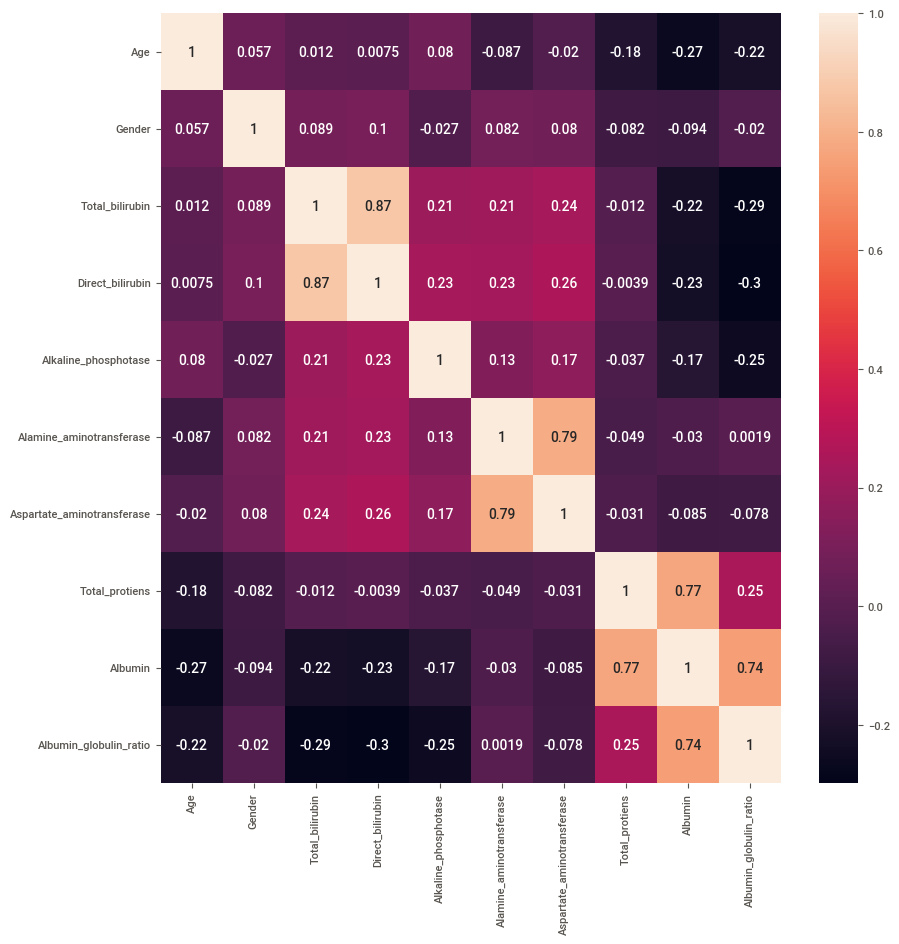

In [80]:
plt.figure(figsize=(10,10))
sns.heatmap(data2.corr(),annot=True)

### Conclusion
The heatmap shows that there no correlation between the veriables hence no feature should be dropped.

# Model Creation

In [81]:
# creating the input and output veriables
X=finaldata.iloc[:,:-1]
y=finaldata.Target

In [82]:
X

,Age,Gender,Total_bilirubin,Direct_bilirubin,Alkaline_phosphotase,Alamine_aminotransferase,Aspartate_aminotransferase,Total_protiens,Albumin,Albumin_globulin_ratio
0,0.709302,0.0,0.004021,0.000000,0.060576,0.003015,0.001626,0.533333,0.521739,0.37500
1,0.674419,1.0,0.140751,0.275510,0.310699,0.027136,0.018296,0.650000,0.500000,0.27500
2,0.674419,1.0,0.092493,0.204082,0.208598,0.025126,0.011791,0.566667,0.521739,0.36875
3,0.627907,1.0,0.008043,0.015306,0.058134,0.002010,0.002033,0.533333,0.543478,0.43750
4,0.790698,1.0,0.046917,0.096939,0.064485,0.008543,0.009961,0.616667,0.326087,0.06250
...,...,...,...,...,...,...,...,...,...,...
578,0.651163,1.0,0.001340,0.000000,0.213483,0.005025,0.004879,0.383333,0.152174,0.04375
579,0.418605,1.0,0.002681,0.000000,0.017098,0.012563,0.004269,0.400000,0.500000,0.50000
580,0.558140,1.0,0.005362,0.005102,0.088911,0.019095,0.007928,0.466667,0.500000,0.43750
581,0.313953,1.0,0.012064,0.020408,0.059111,0.009548,0.004472,0.533333,0.543478,0.43750


In [83]:
y

0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: Target, Length: 583, dtype: int64

In [84]:
# Splitting the data into training and testing

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=75)

In [85]:
X_train.shape # 80% of the data

(466, 10)

In [86]:
X_test.shape # 20% of the data

(117, 10)

As we have split the data into trainig and testing we can balance the Target veriable to get accurate predictions and prevent the algorithm from being biased.

## Blancing the target veriable

In [87]:
from imblearn.over_sampling import SMOTE

In [88]:
smote=SMOTE() # creating a veriable 

In [89]:
# aplying SMOTE on training data
X_smote,y_smote=smote.fit_resample(X_train,y_train)

In [90]:
from collections import Counter # counter is a collection which keeps track of how many times equivalent values are added

In [91]:
print('Actual Classes',Counter(y_train))
print('SMOTE Classes',Counter(y_smote))

Actual Classes Counter({1: 331, 0: 135})
SMOTE Classes Counter({0: 331, 1: 331})


# Logistic Regression Model

In [92]:
# Model creation
from sklearn.linear_model import LogisticRegression

In [93]:
# creating a veriable for logistic regression

lr=LogisticRegression()

In [94]:
lr

LogisticRegression()

In [95]:
# training the model on logistic regression
lr.fit(X_smote,y_smote)

LogisticRegression()

In [96]:
# prediction 
y_predict=lr.predict(X_test)

In [97]:
y_predict

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [98]:
y_test

215    0
152    1
179    1
132    0
476    1
      ..
547    1
568    1
548    1
0      1
473    0
Name: Target, Length: 117, dtype: int64

### Evaluation

In [99]:
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,precision_score,f1_score,classification_report

In [100]:
cm=confusion_matrix(y_test,y_predict) #checking the score for confusion matrix
print(cm)

[[28  4]
 [37 48]]


In [101]:
acc_score=accuracy_score(y_test,y_predict)
print(acc_score) # total correct predictionsout of all prediction

0.6495726495726496


In [102]:
recall=recall_score(y_test,y_predict)
recall #correct positive class out of all positive classes

0.5647058823529412

In [103]:
precision=precision_score(y_test,y_predict)
precision #correct positive predictions

0.9230769230769231

In [104]:
f1=f1_score(y_test,y_predict)
f1 #mean of precision and recall

0.7007299270072993

In [105]:
cr=classification_report(y_test,y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.43      0.88      0.58        32
           1       0.92      0.56      0.70        85

    accuracy                           0.65       117
   macro avg       0.68      0.72      0.64       117
weighted avg       0.79      0.65      0.67       117



# SVM Model

In [106]:
# importing Support vector classifier

from sklearn.svm import SVC

In [107]:
# training the model on SVC
svm=SVC()
svm.fit(X_smote,y_smote)
y_pred=svm.predict(X_test)


In [108]:
accscore=accuracy_score(y_test,y_pred)
accscore

0.5982905982905983

In [109]:
recall_score(y_test,y_pred)

0.4823529411764706

In [110]:
precision_score(y_test,y_pred)

0.9318181818181818

In [111]:
f1_score(y_test,y_pred)

0.6356589147286822

In [112]:
# Checking the crossvalidation score

from sklearn.model_selection import cross_val_score

In [113]:
scores=cross_val_score(svm,X,y,cv=7,scoring='accuracy') 
print(scores)
print("Cross Validation Score",scores.mean())
print("Standard deviation",scores.std())

[0.71428571 0.71428571 0.72289157 0.71084337 0.71084337 0.71084337
 0.71084337]
Cross Validation Score 0.7135480698303418
Standard deviation 0.004099663634259437


In [114]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.40      0.91      0.55        32
           1       0.93      0.48      0.64        85

    accuracy                           0.60       117
   macro avg       0.66      0.69      0.59       117
weighted avg       0.79      0.60      0.61       117



# SVM Hyperparameter tuning

In [115]:
from sklearn.model_selection import GridSearchCV

We are using GridSearchCV to evaluate the model all the possible combinations of hyperparameters so that we can enhance the performance of the model.

In [116]:
# defining the parameter range

parameters={'C':[1,6,11,22,54,79,91],
           'gamma':[0.1,0.01,0.001,0.0001],
           'random_state':(list(range(1,45)))}

In [117]:
model=SVC() #creating a model to storethe SVC algorithm

grid=GridSearchCV(model,parameters,scoring='accuracy',cv=3,refit=True,verbose=2) #creating a veriable with all the criterias and parameters

#model-->model
#parameters---->hyperparametes(dictionary we created)
#scoring--->performance matrix to check performance
#verbose=Controls the verbosity: the higher, the more messages.it is used to print messages
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
#cv------> number of flods/cross validation


grid.fit(X,y) # fitting the model for grid search

Fitting 3 folds for each of 1232 candidates, totalling 3696 fits
[CV] END .....................C=1, gamma=0.1, random_state=1; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=1; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=1; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END .....................C=1, gamma=0.1

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1, 6, 11, 22, 54, 79, 91],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy', verbose=2)

In [118]:
print(grid.best_params_) #getting the best parameters to train the model on

{'C': 1, 'gamma': 0.1, 'random_state': 1}


In [119]:
#creating another veriable with the best parameters with SVC model

tuning=SVC(C=1,gamma=0.1,random_state=1)

In [120]:
#training the model on best hyperparameters

tuning.fit(X_smote,y_smote)

SVC(C=1, gamma=0.1, random_state=1)

In [121]:
y_tuning=tuning.predict(X_test)
y_tuning

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0], dtype=int64)

In [122]:
#checking the accuracy score after hyperparameter tuning

accuracy=accuracy_score(y_test,y_tuning)
accuracy

0.6153846153846154

In [123]:
recall_score(y_test,y_tuning)

0.5411764705882353

In [124]:
precision_score(y_test,y_tuning)

0.8846153846153846

In [125]:
f1=f1_score(y_test,y_tuning)
f1

0.6715328467153285

In [126]:
print(classification_report(y_test,y_tuning))

              precision    recall  f1-score   support

           0       0.40      0.81      0.54        32
           1       0.88      0.54      0.67        85

    accuracy                           0.62       117
   macro avg       0.64      0.68      0.60       117
weighted avg       0.75      0.62      0.63       117



In [127]:
tuning_scores = cross_val_score(tuning,X,y,cv=7,scoring='accuracy')
print(tuning_scores)
print("Cross validation Score:",tuning_scores.mean())
print("Std :",tuning_scores.std())
#std of < 0.05 is good.

[0.71428571 0.71428571 0.72289157 0.71084337 0.71084337 0.71084337
 0.71084337]
Cross validation Score: 0.7135480698303418
Std : 0.004099663634259437


# Decision Tree

In [128]:
from sklearn.tree import DecisionTreeClassifier

In [129]:
# Creating a veriable with decision tree clasifier

dt=DecisionTreeClassifier()
dt.fit(X_smote,y_smote) #training the model
y_predict=dt.predict(X_test) #prediction with X_test

In [130]:
y_predict #predicted values

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [131]:
y_train_predict=dt.predict(X_train) #checking the accuracy of training data
y_train_predict

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,

In [132]:
acc_train=accuracy_score(y_train,y_train_predict)
acc_train

1.0

In [133]:
test_acc=accuracy_score(y_test,y_predict) #testing data accuracy
test_acc

0.6923076923076923

In [134]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.45      0.53      0.49        32
           1       0.81      0.75      0.78        85

    accuracy                           0.69       117
   macro avg       0.63      0.64      0.63       117
weighted avg       0.71      0.69      0.70       117



Model is overfitting because training score is high and testing score is less,
To overcome overfitting we do hyperparametr tuning

# DT Hyperparameter tuning

In [135]:
# defining the parameters for hyperparameter tuning

params={'criterion':("ginni","entropy"), #to measure the purity of the split
       'splitter':("best","random"), #searches the features for the split
       'max_depth':(list(range(1,25))),#height of the tree from 1-20
       'min_samples_split':[2,4,5], #minimum number of samples required to split the internode
       'min_samples_leaf':(list(range(1,25))), #minimum number of samples required to be at the leaf node
       }

In [136]:
tree_dt=DecisionTreeClassifier(random_state=91) #creating an object for dt
tree_cv=GridSearchCV(tree_dt,params,scoring='accuracy',n_jobs=-1,verbose=1,cv=3)

#passing model to gridsearchCV ,
#tree_clf-->model
#params---->hyperparametes(dictionary we created)
#scoring--->performance matrix to check performance
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#verbose=Controls the verbosity: the higher, the more messages.it is used to print messages
#cv------> number of flods/cross validation


In [137]:
tree_cv.fit(X_smote,y_smote) #training the model on gridsearchcv
print(tree_cv.best_params_)

Fitting 3 folds for each of 6912 candidates, totalling 20736 fits
{'criterion': 'entropy', 'max_depth': 21, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


In [145]:
#creating another object for  decision tree with best parameters 

dt1=DecisionTreeClassifier(criterion='entropy',max_depth=21,min_samples_leaf=1,min_samples_split=2,splitter='random')
dt1.fit(X_smote,y_smote) #training the model with best hyperparameters


DecisionTreeClassifier(criterion='entropy', max_depth=21, splitter='random')

In [146]:
y_predict1=dt1.predict(X_test)
y_predict1

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [147]:
acc_test=accuracy_score(y_test,y_predict1)
acc_test

0.7094017094017094

In [148]:
recall_score(y_test,y_predict1)

0.7294117647058823

In [149]:
precision_score(y_test,y_predict1)

0.8493150684931506

In [150]:
f1_score(y_test,y_predict1)

0.7848101265822783

In [151]:
print(classification_report(y_test,y_predict1))

              precision    recall  f1-score   support

           0       0.48      0.66      0.55        32
           1       0.85      0.73      0.78        85

    accuracy                           0.71       117
   macro avg       0.66      0.69      0.67       117
weighted avg       0.75      0.71      0.72       117



# RandomForest

In [152]:
from sklearn.ensemble import RandomForestClassifier

In [153]:
#creating object for RandomForestClassifier

rf=RandomForestClassifier() #taking 100 decision tree in random forest
rf.fit(X_smote,y_smote) #training themodel with rf
y_predict=rf.predict(X_test)

In [154]:
y_predict

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [155]:
acc_test_=accuracy_score(y_test,y_predict) #testing accuracy
acc_test_

0.6837606837606838

In [156]:
y_train_predict=rf.predict(X_train)

In [157]:
accuracy_score(y_train,y_train_predict) #training accuracy

1.0

In [158]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.44      0.59      0.51        32
           1       0.82      0.72      0.77        85

    accuracy                           0.68       117
   macro avg       0.63      0.66      0.64       117
weighted avg       0.72      0.68      0.70       117



Model is overfitting because training score is high and testing score is less,
To overcome overfitting we do hyperparametr tuning

# RF Hyperprameter tuning

In [ ]:
#Defining the parameters for hyperparameter tuning

n_estimators=[int(x) for x in np.linspace(start=10,stop=300,num=10)] #List Comprehension-using for loop in list for estimator range from 100-2000
max_features=['auto'] #maximum no of features allowed to try in each tree
max_depth=[int(x) for x in np.linspace(start=10,stop=100,num=15)] #List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split=[2,5,10] #minimum number of samples required to split an internal node
min_samples_leaf=[3,4,8]#minimum number of samples required to be at a leaf node
bootstrap=[True,False] #sampling


In [ ]:
#creating an object to store the hyperparemeters in dictonary format

grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,
     'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap}

In [ ]:
#creating and training the model on defined parameters

rfc=RandomForestClassifier(random_state=35) #taking 100 dt by default
rf_cv=GridSearchCV(estimator=rfc,scoring='accuracy',cv=3,param_grid=grid,n_jobs=-1,refit=True,verbose=2)


#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_grid-->hyperparametes(dictionary we created)
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#refit-----> refit the model on entire dataset using best parameters found


rf_cv.fit(X_smote,y_smote)
rf_best_params=rf_cv.best_params_ #it will give us best parameters
print('Best parameters',rf_best_params)

In [ ]:
# creating another object with best parameters 

rf_cv1=RandomForestClassifier(bootstrap=False,max_depth=22,max_features='auto',min_samples_leaf=3,min_samples_split=2,n_estimators=74)
rf_cv1.fit(X_smote,y_smote) #training
y_predict1=rf_cv1.predict(X_test) #testing
y_predict1

In [ ]:
acc_rfhpt=accuracy_score(y_test,y_predict1)
acc_rfhpt

In [ ]:
print(classification_report(y_test,y_predict1))

# KNN

In [159]:
from sklearn.neighbors import KNeighborsClassifier

In [160]:
# creating object

error_rate=[] #creating an empty list, #by taking different values of k, error rate gets calculated and we get multiple values of k

for i in range(1,11):
    KNN=KNeighborsClassifier(n_neighbors=i) #creating an object with KNN 
    KNN.fit(X_smote,y_smote) #training 
    pred_i=KNN.predict(X_test) #prediction
    error_rate.append(np.mean(pred_i!=y_test)) #getting the mean of 

Text(0, 0.5, 'Error Rate')

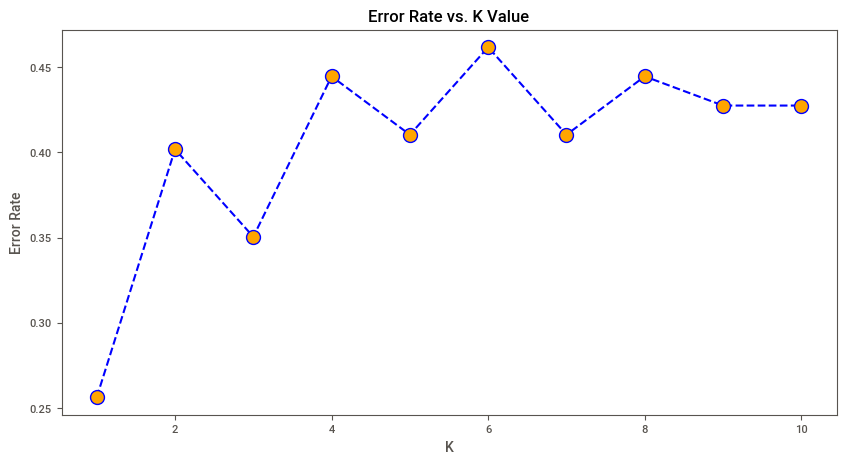

In [161]:
# plotting a graph to get multiple values of k
plt.figure(figsize=(10,5))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='orange', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Conclusion: The values of k is sharply dropping from 2 hence the optimum values of k is 3.

In [162]:
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_smote,y_smote) #traning the model with k values equal to 3


KNeighborsClassifier(n_neighbors=3)

In [163]:
y_predict_KNN=KNN.predict(X_test)
y_predict_KNN

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [164]:
acc_knn=accuracy_score(y_test,y_predict_KNN)
acc_knn

0.6495726495726496

In [165]:
print(classification_report(y_test,y_predict_KNN))

              precision    recall  f1-score   support

           0       0.41      0.62      0.49        32
           1       0.82      0.66      0.73        85

    accuracy                           0.65       117
   macro avg       0.62      0.64      0.61       117
weighted avg       0.71      0.65      0.67       117



# Bagging(estimator=KNN)


In [166]:
from sklearn.ensemble import BaggingClassifier

In [167]:
#Object creation,training and prediction

model_bagg=BaggingClassifier(base_estimator=KNN,n_estimators=9)
model_bagg.fit(X_smote,y_smote)
y_predict_bagg=model_bagg.predict(X_test)

In [168]:
y_predict_bagg

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [169]:
bagg_knn=accuracy_score(y_test,y_predict_bagg)
bagg_knn

0.6239316239316239

In [170]:
print(classification_report(y_test,y_predict_bagg))

              precision    recall  f1-score   support

           0       0.38      0.62      0.48        32
           1       0.82      0.62      0.71        85

    accuracy                           0.62       117
   macro avg       0.60      0.62      0.59       117
weighted avg       0.70      0.62      0.64       117



# Bagging (estimator=Logistic Regression)

In [171]:
#Object creation,training and prediction

bagg_LR=BaggingClassifier(base_estimator=lr,n_estimators=19)
bagg_LR.fit(X_smote,y_smote)
y_predict_bagg2=bagg_LR.predict(X_test)

In [172]:
y_predict_bagg2

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [173]:
bagg_lr=accuracy_score(y_test,y_predict_bagg2)
bagg_lr

0.6324786324786325

In [174]:
print(classification_report(y_test,y_predict_bagg2))

              precision    recall  f1-score   support

           0       0.42      0.91      0.57        32
           1       0.94      0.53      0.68        85

    accuracy                           0.63       117
   macro avg       0.68      0.72      0.63       117
weighted avg       0.80      0.63      0.65       117



# Bagging (estimator=SVM)

In [175]:
#Object creation,training and preediction

bagg_svm=BaggingClassifier(base_estimator=svm,n_estimators=15)
bagg_svm.fit(X_smote,y_smote)
y_predict_bagg3=bagg_svm.predict(X_test)

In [176]:
y_predict_bagg3

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [177]:
bagg_svm=accuracy_score(y_test,y_predict_bagg3)
bagg_svm

0.5897435897435898

# Boosting

In [178]:
from sklearn.ensemble import GradientBoostingClassifier

In [179]:
#Object creation,training and prediction

gb=GradientBoostingClassifier(n_estimators=100)
gb.fit(X_smote,y_smote)
y_predict_gb=gb.predict(X_test)

In [180]:
y_predict_gb

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [181]:
boost=accuracy_score(y_test,y_predict_gb)
boost

0.6666666666666666

In [182]:
print(classification_report(y_test,y_predict_gb))

              precision    recall  f1-score   support

           0       0.42      0.56      0.48        32
           1       0.81      0.71      0.75        85

    accuracy                           0.67       117
   macro avg       0.61      0.63      0.62       117
weighted avg       0.70      0.67      0.68       117



### XGBoost

In [183]:
from xgboost import XGBClassifier

In [184]:
#Object creation,training and prediction

xgb=XGBClassifier()
xgb.fit(X_smote,y_smote)
y_predict_xgb=xgb.predict(X_test)

In [185]:
y_predict_xgb

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0])

In [186]:
xgb=accuracy_score(y_test,y_predict_xgb)
xgb

0.717948717948718

In [187]:
print(classification_report(y_test,y_predict_xgb))

              precision    recall  f1-score   support

           0       0.49      0.62      0.55        32
           1       0.84      0.75      0.80        85

    accuracy                           0.72       117
   macro avg       0.66      0.69      0.67       117
weighted avg       0.75      0.72      0.73       117



# ANN

In [188]:
from sklearn.neural_network import MLPClassifier

In [189]:
#Creating object with model and training the model

ANN=MLPClassifier(hidden_layer_sizes=(50,3),# 3 hidden layer with 50 nodes
                 learning_rate_init=0.1, #step size in gradient descennt
                 random_state=52)
ANN.fit(X_smote,y_smote)
y_predict_ANN=ANN.predict(X_test)

In [190]:
y_predict_ANN

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [191]:
ann=accuracy_score(y_test,y_predict_ANN)
ann

0.6923076923076923

In [192]:
print(classification_report(y_test,y_predict_ANN))

              precision    recall  f1-score   support

           0       0.46      0.69      0.55        32
           1       0.86      0.69      0.77        85

    accuracy                           0.69       117
   macro avg       0.66      0.69      0.66       117
weighted avg       0.75      0.69      0.71       117



# Model Comparision

In [193]:
models=pd.DataFrame({'Model':['LogisticRegression','SVM','SVM HPT','Desicion Tree Classifier','DT HPT','Random Forest Classifier','KNN',
                            'Bagging(KNN)','Bagging(LR)','Bagging(SVM)','Boosting','XGBoost','ANN'],
                     'Score':[100*round(acc_score,4),100*round(accscore,4),100*round(accuracy,4),100*round(test_acc,4),
                             100*round(acc_test,4),100*round(acc_test_,4),100*round(acc_knn,4),100*round(bagg_knn,4),100*round(bagg_lr,4),
                             100*round(bagg_svm,4),100*round(boost,4),100*round(xgb,4),100*round(ann,4)]})

In [194]:
new=pd.DataFrame(models.sort_values(by='Score',ascending=False))

In [195]:
new

,Model,Score
11,XGBoost,71.79
4,DT HPT,70.94
3,Desicion Tree Classifier,69.23
12,ANN,69.23
5,Random Forest Classifier,68.38
10,Boosting,66.67
0,LogisticRegression,64.96
6,KNN,64.96
8,Bagging(LR),63.25
7,Bagging(KNN),62.39


<Axes: xlabel='Model', ylabel='Score'>

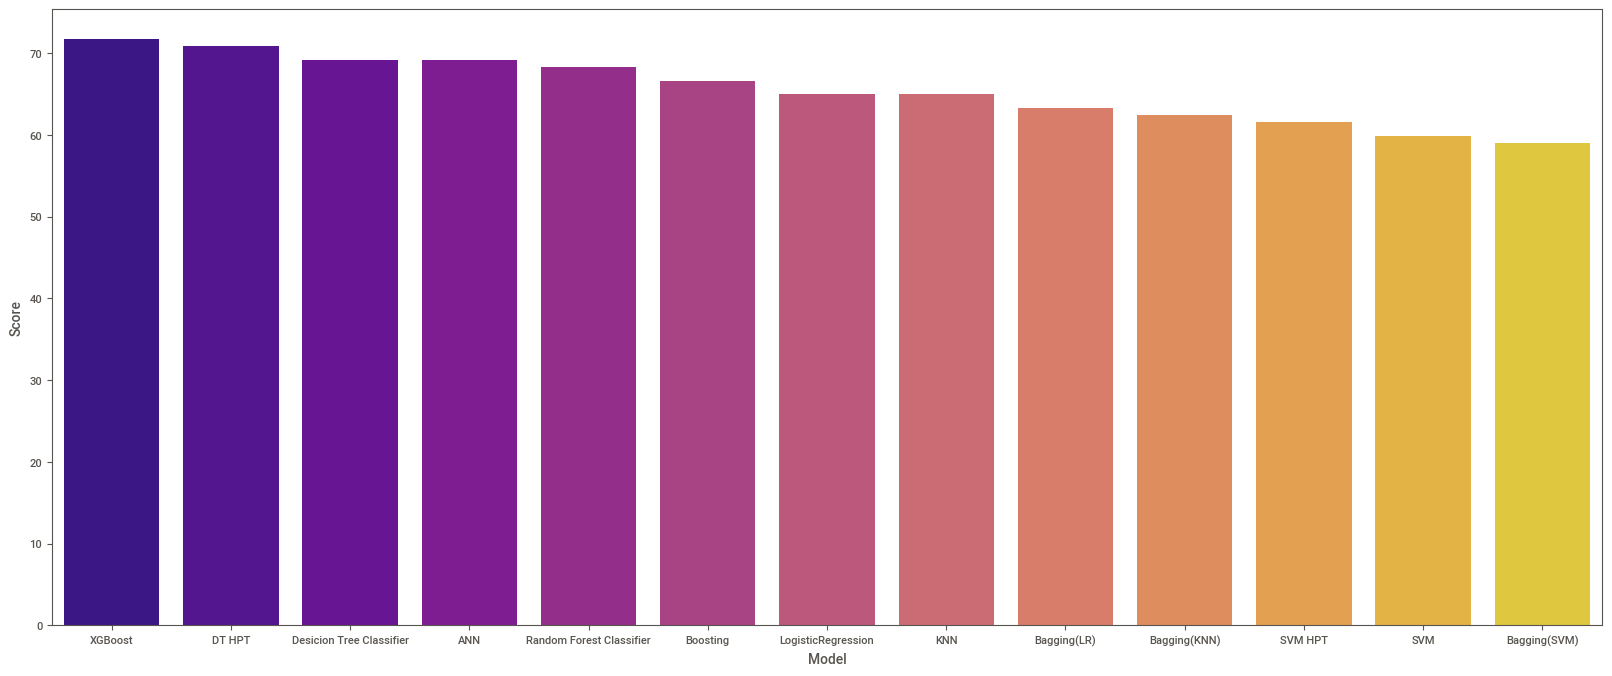

In [196]:
plt.figure(figsize=(20,8))
sns.barplot(data=new,x='Model',y='Score',palette='plasma')

# Model Comparision Report

To predict the liver disease the following classifier models are implemented:

1. Logistic Regression
2. Support Vector Classifier(SVC)
3. Decision Tree Classifier
4. Random Forest
5. KNN
6. ANN

Along with the classifiers model Hyperparameter Tuning and Ensemble techniques are also used to check whether the performance of the model is increased.

Among all the model tested, KNN gave the most efficient and moderately accurate result as compared to other models tested. Apart from "KNN", "ANN" model created using Ensemble technique shows promising accuracy of 70%.SVM and KNN shows low performance and it can be enhanced using more parameters.


# Export the model

In [213]:
#import joblib
#joblib.dump(xgb,'liver_patient_prediction.ml')

['liver_patient_prediction.ml']